## Aplicação de Clusterização em Redes Móveis



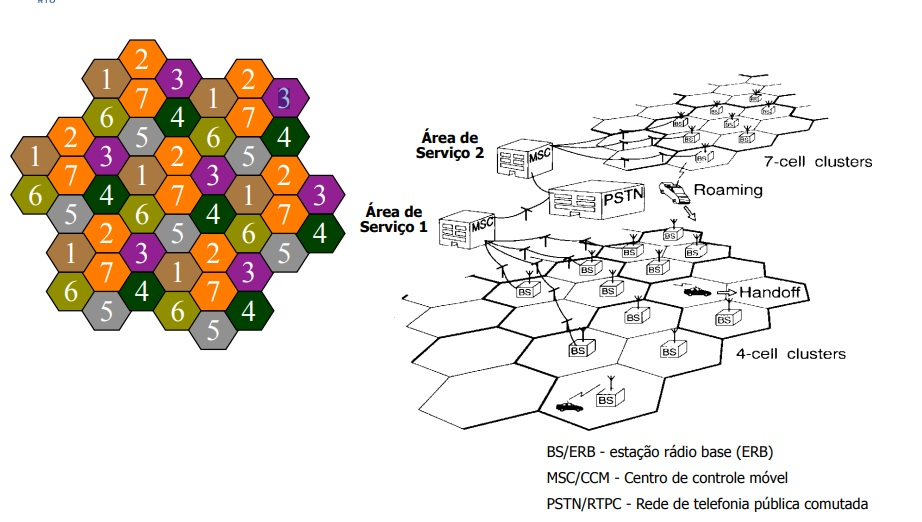

Fonte da figura:https://silvamello.org/Luiz_da_Silva_Mello/Notas_de_Aula_files/ELE_2614_Cap_2_Conceitos_Ba%CC%81sicos.pdf

## Definição do problema de negócio

As redes móveis usam equipamentos de rádio e antenas para disponibilizar sinal aos usuários do sistema. Esses equipamentos são distribuídos estrategicamente, segundo critérios técnicos, em diversas localidades, e com aumento de usuários e uso do serviço móvel celular, mais equipamentos de rádio são necessários.  Cada um desses equipamentos são chamados de eNodeBs (tecnologia 4G) e há uma troca de mensagens de sinalização entre esses equipamentos e os elementos de controle da rede móvel e os celulares dos usuários. Com o objetivo de reduzir essa troca de mensagens de sinalização são criados clusters lógicos de eNodeBs chamados de TAC (Tracking Area Code). As TACs também são importantes para direcionar o tráfego  para elementos específicos de controle da rede móvel, conhecido como "core". O objetivo deste projeto é definir os clusters de uma operadora celular usando tecnologia 4G na cidade de São Paulo com aprendizado de máquina não supervisionado.

Usaremos uma base de dados pública divulgado no site da Anatel, que indica as latitudes e longitudes de cada estação, e um mapa disponibilizado no site do IBGE com as coordenadas geogáficas dos limites da cidade de São Paulo para facilitar a visualização dos clusters de células.

##Como funciona o KMeans?

O KMeans é um algoritmo de aprendizagem não supervisionado baseado distâncias entre as instâncias. Os passos do algoritmo são simples e basicamente compreende:
1. Definir k centróides aleatórios (k é o número de clusters);
2. Para cada ponto de dados calcular a distância do centróide mais próximo e criar clusters com os elementos mais próximos de seu respectivo centróide .
3. Para cada cluster criado calcular novos centróides
4. Repetir o processo por n iterações
O grande desafio da clusterização é encontrar o número de clusters, que pode ser definido pela área de conhecimento do negócio, por métricas de desempenho, ou ambos.

Neste projeto será utilizado o pacote Scikit Learning e a linguagem Python para implementação e avaliação do aprendizado de máquina.

## Código

#Importação dos pacotes

In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
#import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pylab
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Coleta dos dados, análise exploratória e pré-processamento

In [29]:
sites = pd.read_excel("/content/drive/MyDrive/dataviz/Jun22.xlsx")

In [30]:
sites.head()

,NumEstacao,Operadora,SiglaUf,MUN,Bairro,LOGRADOURO,Latitude,Longitude,IBGE,Tecs
0,1058,TIM,AL,Flexeiras,NaN,RODOVIA BR 101 NORTE 0 MORRO CORTE NOVO,-9.241111,-35.779472,2702801,2G 3G 4G
1,2119,TIM,AL,Maceió,NaN,"RUA SAO FRANCISCO DE ASSIS,1000,JATIUCA",-9.654881,-35.712517,2704302,2G 3G 4G
2,3549,Vivo,RS,Vacaria,NaN,"Av. Julio de Castilhos, ,925,Centro",-28.505547,-50.935831,4322509,2G 3G 4G
3,3565,Vivo,RS,Rio Grande,NaN,"Rua Duque de Caxias,298,Centro",-32.033890,-52.096940,4315602,2G 3G 4G
4,3620,Vivo,RS,Bagé,NaN,"Rua General Osorio,1.724,Centro",-31.320911,-54.109086,4301602,2G 3G 4G


In [31]:
#sites['Tecnologia1'], sites['Tecnologia2'], sites['Tecnologia3'], sites['Tecnologia4'] = sites['Tecs'].str.split(' ', 3, expand=True).str
sites[['Tecnologia1','Tecnologia2','Tecnologia3', 'Tecnologia4']]=sites.Tecs.str.split(' ',expand=True)
del sites['Tecs']
sites.head()

,NumEstacao,Operadora,SiglaUf,MUN,Bairro,LOGRADOURO,Latitude,Longitude,IBGE,Tecnologia1,Tecnologia2,Tecnologia3,Tecnologia4
0,1058,TIM,AL,Flexeiras,NaN,RODOVIA BR 101 NORTE 0 MORRO CORTE NOVO,-9.241111,-35.779472,2702801,2G,3G,4G,None
1,2119,TIM,AL,Maceió,NaN,"RUA SAO FRANCISCO DE ASSIS,1000,JATIUCA",-9.654881,-35.712517,2704302,2G,3G,4G,None
2,3549,Vivo,RS,Vacaria,NaN,"Av. Julio de Castilhos, ,925,Centro",-28.505547,-50.935831,4322509,2G,3G,4G,None
3,3565,Vivo,RS,Rio Grande,NaN,"Rua Duque de Caxias,298,Centro",-32.033890,-52.096940,4315602,2G,3G,4G,None
4,3620,Vivo,RS,Bagé,NaN,"Rua General Osorio,1.724,Centro",-31.320911,-54.109086,4301602,2G,3G,4G,None


In [32]:
sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99498 entries, 0 to 99497
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NumEstacao   99498 non-null  int64  
 1   Operadora    99498 non-null  object 
 2   SiglaUf      99498 non-null  object 
 3   MUN          99498 non-null  object 
 4   Bairro       0 non-null      float64
 5   LOGRADOURO   99423 non-null  object 
 6   Latitude     99498 non-null  float64
 7   Longitude    99498 non-null  float64
 8   IBGE         99498 non-null  int64  
 9   Tecnologia1  99498 non-null  object 
 10  Tecnologia2  73987 non-null  object 
 11  Tecnologia3  49510 non-null  object 
 12  Tecnologia4  1726 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 9.9+ MB


In [33]:
sites.describe()

,NumEstacao,Bairro,Latitude,Longitude,IBGE
count,9.949800e+04,0.0,9.949800e+04,9.949800e+04,9.949800e+04
mean,7.925042e+08,NaN,-1.082447e+02,-2.061945e+02,3.373593e+06
std,2.131523e+08,NaN,1.635767e+04,2.920800e+04,9.065651e+05
min,1.058000e+03,NaN,-2.984472e+06,-5.710806e+06,1.100015e+06
25%,6.862222e+08,NaN,-2.353920e+01,-4.921500e+01,2.925833e+06
50%,6.964844e+08,NaN,-2.141085e+01,-4.663778e+01,3.305109e+06
75%,1.004140e+09,NaN,-1.293379e+01,-4.304158e+01,4.104006e+06
max,1.013272e+09,NaN,7.145250e+01,5.097333e+01,5.300108e+06


Filtrar operadora, cidade e tecnologia

In [34]:
sitesSelecionados = sites[(sites['Operadora'] == "TIM")  & (sites['MUN'] == "São Paulo") & ((sites['Tecnologia1'] == "4G") | (sites['Tecnologia2'] == "4G") | (sites['Tecnologia3'] == "4G") | (sites['Tecnologia4'] == "4G"))]
sitesSelecionados.head()

,NumEstacao,Operadora,SiglaUf,MUN,Bairro,LOGRADOURO,Latitude,Longitude,IBGE,Tecnologia1,Tecnologia2,Tecnologia3,Tecnologia4
9698,641201680,TIM,SP,São Paulo,NaN,"RUA NAPOLEAO DE BARROS ,920,VILA CLEMENTINO",-23.599333,-46.644556,3550308,2G,3G,4G,None
9706,641202504,TIM,SP,São Paulo,NaN,"RUA IBITURUNA,315,SAUDE",-23.622528,-46.636944,3550308,2G,3G,4G,None
9708,641202601,TIM,SP,São Paulo,NaN,Rua Pamplona,-23.565411,-46.655100,3550308,2G,3G,4G,None
9709,641202750,TIM,SP,São Paulo,NaN,RUA PEIXOTO GOMIDE 515 COND. ED. CENTRO MÉDICO...,-23.558917,-46.655333,3550308,2G,3G,4G,5G
9711,641202857,TIM,SP,São Paulo,NaN,RUA DOUTOR MELO ALVES,-23.558900,-46.667936,3550308,2G,3G,4G,None


In [35]:
sitesSelecionados.count()

NumEstacao     2870
Operadora      2870
SiglaUf        2870
MUN            2870
Bairro            0
LOGRADOURO     2870
Latitude       2870
Longitude      2870
IBGE           2870
Tecnologia1    2870
Tecnologia2    1298
Tecnologia3    1127
Tecnologia4      64
dtype: int64

Seleção dos atributos necessários

In [36]:
sitesSelecionados = sitesSelecionados.filter(['NumEstacao','Operadora','MUN','Latitude','Longitude'])
sitesSelecionados.head()

,NumEstacao,Operadora,MUN,Latitude,Longitude
9698,641201680,TIM,São Paulo,-23.599333,-46.644556
9706,641202504,TIM,São Paulo,-23.622528,-46.636944
9708,641202601,TIM,São Paulo,-23.565411,-46.655100
9709,641202750,TIM,São Paulo,-23.558917,-46.655333
9711,641202857,TIM,São Paulo,-23.558900,-46.667936


Visualização dos dados em um gráfico de dispersão 

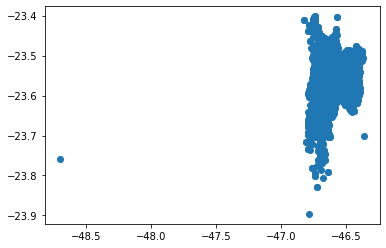

In [37]:
plt.scatter(sitesSelecionados['Longitude'],sitesSelecionados['Latitude'])
plt.show()

Remoção de outlier

In [38]:
outlier = sitesSelecionados[sitesSelecionados['Longitude'] < -48]
outlier

,NumEstacao,Operadora,MUN,Latitude,Longitude
58751,1000215765,TIM,São Paulo,-23.758694,-48.703639


In [39]:
indice = sitesSelecionados[ sitesSelecionados['NumEstacao'] == 1000215765 ].index
sitesSelecionados.drop(indice, inplace = True)

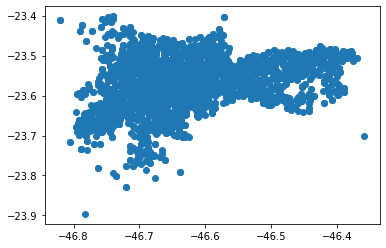

In [40]:
plt.scatter(sitesSelecionados['Longitude'],sitesSelecionados['Latitude'])
plt.show()

Remoção de outro outlier

In [41]:
outlier = sitesSelecionados[(sitesSelecionados['Longitude'] > -46.4) & (sitesSelecionados['Latitude'] < -23.7)]
outlier

,NumEstacao,Operadora,MUN,Latitude,Longitude
55556,699685893,TIM,São Paulo,-23.702306,-46.358194


In [42]:
indice = sitesSelecionados[ sitesSelecionados['NumEstacao'] == 699685893 ].index
sitesSelecionados.drop(indice, inplace = True)

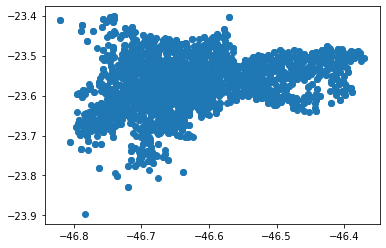

In [43]:
plt.scatter(sitesSelecionados['Longitude'],sitesSelecionados['Latitude'])
plt.show()

In [44]:
coordenadas = sitesSelecionados[['Longitude','Latitude']]
coordenadas.head()

,Longitude,Latitude
9698,-46.644556,-23.599333
9706,-46.636944,-23.622528
9708,-46.655100,-23.565411
9709,-46.655333,-23.558917
9711,-46.667936,-23.558900


Normalizar os dados para o algoritmo KMeans

In [45]:
coordenadasAjustadas = StandardScaler().fit_transform(coordenadas)

## Aprendizagem não supervisionada - Clusterização para criação de TACs

Para definição do número de TACs a quantidade de células não pode ser alta, pois isso impactaria em uma grande área com intensa sinalização, nem pequena, pois exigiria um aumento de sinalização na mobilidade dos usuários entre as TACs.

In [56]:
pylab.rcParams['figure.figsize'] = (10.0, 4.0)

# Inertia = Soma das distâncias das amostras para o seu centro de agrupamento mais próximo.

# Lista de valores de K
Ks = range(2, 100)

# Lista para as métricas
valores_metrica = []
score = []

# Loop por diferentes modelos com diferentes valores de K
for K in Ks:
    cluster = KMeans(n_clusters=K, max_iter=2000, algorithm= 'elkan')
    TAC = cluster.fit_predict(coordenadasAjustadas)
    valores_metrica.append(cluster.inertia_)
    score.append(silhouette_score(coordenadasAjustadas, TAC))
    



Métricas para definição do número de clusters

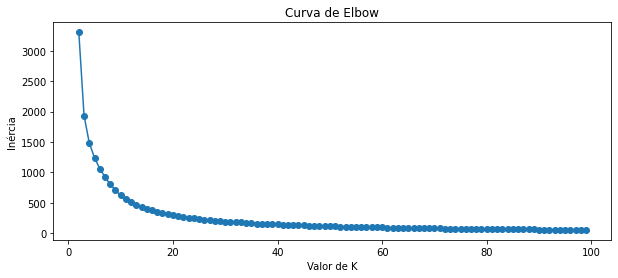

In [57]:
plt.plot(Ks, valores_metrica, 'o-')
plt.xlabel("Valor de K")
plt.ylabel("Inércia")
plt.title("Curva de Elbow")
plt.show()

A curva de Elbow mede a distância média dos pontos de dados para cada centróide de seu cluster. Baseado nesta métrica o K ideal seria um valor de K próximo de 10, entretanto esse valor é muito baixo, pois exigiria uma grande quantidade de células por TAC, o que vai de encontro ao objetivo do projeto. Dessa forma avaliaremos o número de K com uma outra métrica. 

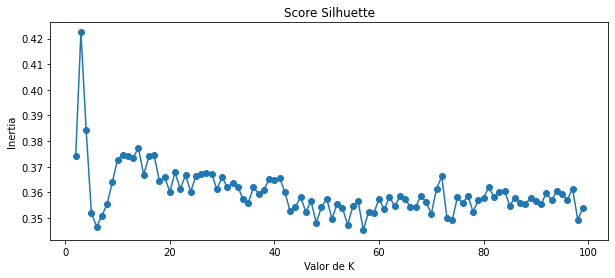

In [58]:
plt.plot(Ks, score, 'o-')
plt.xlabel("Valor de K")
plt.ylabel("Inertia")
plt.title("Score Silhuette")
plt.show()

O score Silhuette avalia a relação entre as médias das distâncias entre os pontos de dados dentro de cada cluster e as médias das distâncias entre os pontos de dados do mesmo cluster com os pontos de dados do cluster mais próximo e os valores variam entre 1 e -1, mostrando a coesão dos dados em relação ao seu cluster. Valores mais próximos de 1 indicam que o ponto está no cluster mais adequado, valores próximos de 0 indicam pontos próximos da borda do cluster e valores negativos indicam outliers.
Um valor de 10 clusters também parece indicado por essa métrica, mas da mesma forma que observado anteriormente K = 10 é um valor muito baixo para o negócio em questão.


Uma vez que as duas métricas analisadas não se mostraram aderentes às premissas do projeto usaremos a regra geral de K = SQRT(n/2), onde n é o número de pontos de dados, ou seja, K = SQRT(2868/2) = 38. Lembrando que das 2870 observações retiramos dois outliers.
K = 38 está aderente às duas métricas observadas anteriormente e também aos requisitos do negócio.

In [59]:
cluster = KMeans(n_clusters=38, max_iter=20000, algorithm= 'elkan')
TACs = cluster.fit_predict(coordenadasAjustadas)
sitesSelecionados['cluster'] = TACs
sitesSelecionados.head()

,NumEstacao,Operadora,MUN,Latitude,Longitude,cluster
9698,641201680,TIM,São Paulo,-23.599333,-46.644556,6
9706,641202504,TIM,São Paulo,-23.622528,-46.636944,37
9708,641202601,TIM,São Paulo,-23.565411,-46.655100,30
9709,641202750,TIM,São Paulo,-23.558917,-46.655333,34
9711,641202857,TIM,São Paulo,-23.558900,-46.667936,34


Função para imprimir um gráfico do score silhouette por cluster já que o valor médio apresentado anteriormente apresenta baixa variação. O código abaixo foi integralmente copiado do github (Jcharis
/Python-Machine-Learning/Unsupervised_Machine_Learning/Unsupervised ML with Python Crash Course.ipynb).


In [60]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
def silhouette_plot(X, y, n_clusters, ax=None):
	if ax is None:
		ax = plt.gca()
		# Compute the silhouette scores for each sample
		silhouette_avg = silhouette_score(X, y)
		sample_silhouette_values = silhouette_samples(X, y)
		y_lower = padding = 2
		for i in range(n_clusters):
	# Aggregate the silhouette scores for samples belonging to
			ith_cluster_silhouette_values = sample_silhouette_values[y == i]
			ith_cluster_silhouette_values.sort()
			size_cluster_i = ith_cluster_silhouette_values.shape[0]
			y_upper = y_lower + size_cluster_i
			color = cm.nipy_spectral(float(i) / n_clusters)
			ax.fill_betweenx(np.arange(y_lower, y_upper),
							0,ith_cluster_silhouette_values,
							facecolor=color,
							edgecolor=color,
							alpha=0.7)
			# Label the silhouette plots with their cluster numbers at the middle
			ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i + 1))
			# Compute the new y_lower for next plot
			y_lower = y_upper + padding
		ax.set_xlabel("The silhouette coefficient values")
		ax.set_ylabel("Cluster label")
		# The vertical line for average silhoutte score of all the values
		ax.axvline(x=silhouette_avg, c='r', alpha=0.8, lw=0.8, ls='-')
		ax.annotate('Average',
					xytext=(silhouette_avg, y_lower * 1.025),
					xy=(0, 0),
					ha='center',
					alpha=0.8,
					c='r')
		ax.set_yticks([]) # Clear the yaxis labels / ticks
		ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
		ax.set_ylim(0, y_upper + 1)
		ax.set_xlim(-0.075, 1.0)
		return ax

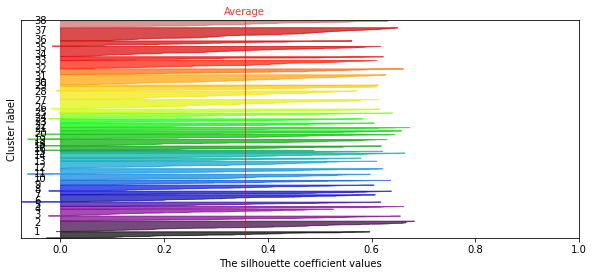

In [61]:
### Silhuette Plot

clusters = sitesSelecionados['cluster']
silhouette_plot(coordenadasAjustadas,clusters,38,ax=None)
plt.show()

Observa-se que alguns clusters apresentam socre silhuette abaixo de zero, o que indica a existência de alguns outliers.Abaixo uma visualização melhor de 5 clusters.

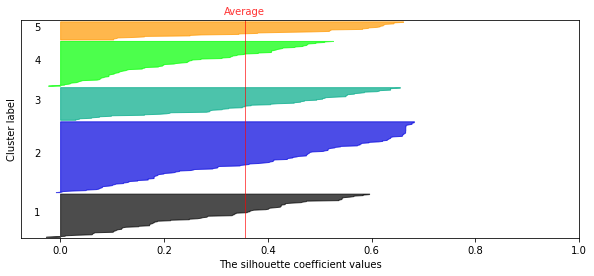

In [62]:
### Silhoutte Plot

clusters = sitesSelecionados['cluster']
silhouette_plot(coordenadasAjustadas,clusters,5,ax=None)
plt.show()

Esse gráfico mostra com melhor definição o score silhouette de 5 clusters. De uma maneira geral o resultado é bom, pois a quantidade de células é alta e há a premissa de não haver TACs com muitas ou poucas células. 

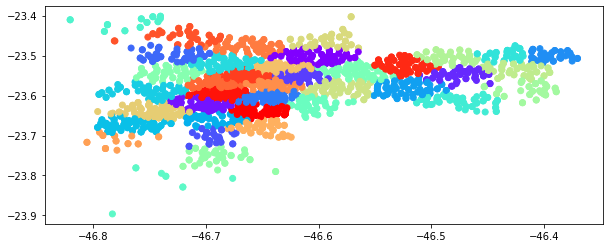

In [67]:
plt.scatter(sitesSelecionados['Longitude'],sitesSelecionados['Latitude'],c=sitesSelecionados['cluster'],cmap='rainbow')
plt.show()

In [69]:
sitesSelecionados.groupby(['cluster']).count()['NumEstacao']


cluster
0      87
1     142
2      66
3      90
4      37
5      57
6      97
7      47
8      80
9      62
10     81
11     74
12     98
13     40
14     66
15     23
16      9
17     58
18     87
19     66
20     48
21     43
22     58
23     55
24     76
25     52
26    127
27    114
28     56
29     20
30    137
31     78
32    112
33     49
34    137
35     73
36    177
37     89
Name: NumEstacao, dtype: int64

## Utilizando o Geopandas para plotar os pontos no mapa da cidade de São Paulo

In [70]:
sitesSelecionados['geometry'] = 'None'

In [71]:
for index, row in sitesSelecionados.iterrows():
  sitesSelecionados.loc[index, 'geometry'] = Point(row.Longitude, row.Latitude)

In [72]:
  sitesSelecionados.head()

,NumEstacao,Operadora,MUN,Latitude,Longitude,cluster,geometry
9698,641201680,TIM,São Paulo,-23.599333,-46.644556,6,POINT (-46.6445555555556 -23.5993333333333)
9706,641202504,TIM,São Paulo,-23.622528,-46.636944,37,POINT (-46.6369444444444 -23.6225277777778)
9708,641202601,TIM,São Paulo,-23.565411,-46.655100,30,POINT (-46.6551 -23.565411)
9709,641202750,TIM,São Paulo,-23.558917,-46.655333,34,POINT (-46.6553333333333 -23.5589166666667)
9711,641202857,TIM,São Paulo,-23.558900,-46.667936,34,POINT (-46.667936 -23.5589)


In [73]:
geositesSelecionados = gpd.GeoDataFrame(sitesSelecionados, geometry = 'geometry')

In [74]:
type(geositesSelecionados)

geopandas.geodataframe.GeoDataFrame

In [75]:
mapaSP = gpd.read_file('/content/drive/MyDrive/dataviz/MunicipioSP.json')

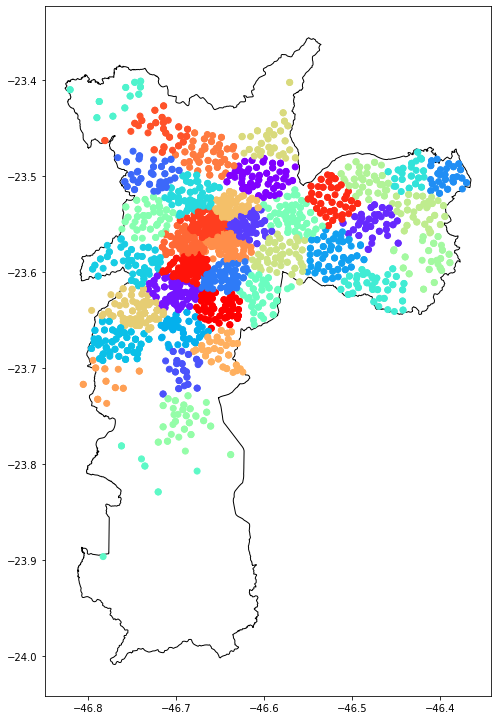

In [76]:
fig, ax = plt.subplots(figsize = (8,20))
mapaSP.plot(ax = ax, facecolor = 'None', edgecolor = 'black')
plt.scatter(sitesSelecionados['Longitude'],sitesSelecionados['Latitude'],c=sitesSelecionados['cluster'],cmap='rainbow')
plt.show()

## Conclusão

Esse projeto mostrou um exemplo de aplicação de clusterização com machine learning para apoiar e automatizar a implementação ou otimização de uma rede móvel, utilizando aprendizado não supervisionado com o algoritmo KMeans implementado com o pacote ScikitLearn. Foi aplicada normalização de dados, comum em algoritmos que utilizam cálculo de distâncias entre os pontos de dados, foi usado gráfico de dispersão na análise exploratória dos dados que ajudou a identificar dois outliers e removê-los do conjunto de dados, foram utilizadas duas métricas para avaliação dos resultados e definição do número de clusters, mas que no final foi definido por requisitos do negócio. Finalizando, os clusters foram visualizados no gráfico de dispersão em conjunto como o contorno do mapa da cidade de São Paulo, o que facilita a interpretação do resultado e ajuste manual de inconsistências encontradas.